In [1]:
import numpy as np
import pandas as pd
from scipy import signal
import seaborn as sns
import matplotlib.pyplot as plt
import os

In [2]:
for dirname, _, filenames in os.walk('.\data'):
    for filename in filenames:
        print(os.path.join(dirname,filename))

.\data\P812_M050_2_B_FoG_trial1_annotation.csv
.\data\P812_M050_2_B_FoG_trials.mat
.\data\P812_M050_2_B_FoG_trial_1_emg.csv
.\data\P812_M050_2_B_FoG_trial_1_out_left_foot.csv
.\data\P812_M050_2_B_FoG_trial_1_out_lower_left_foot.csv
.\data\P812_M050_2_B_FoG_trial_1_out_lower_right_foot.csv
.\data\P812_M050_2_B_FoG_trial_1_out_right_foot.csv
.\data\P812_M050_2_B_FoG_trial_2_emg.csv
.\data\P812_M050_2_B_FoG_trial_2_out_left_foot.csv
.\data\P812_M050_2_B_FoG_trial_2_out_lower_left_foot.csv
.\data\P812_M050_2_B_FoG_trial_2_out_lower_right_foot.csv
.\data\P812_M050_2_B_FoG_trial_2_out_right_foot.csv
.\data\P812_M50_2_B_FoG_trial2_annotation.csv


In [3]:
emg_data = pd.read_csv('.\data\P812_M050_2_B_FoG_trial_1_emg.csv')
t1olf = pd.read_csv('.\data\P812_M050_2_B_FoG_trial_1_out_left_foot.csv')
emg_data2 = pd.read_csv('.\data\P812_M050_2_B_FoG_trial_2_emg.csv')

In [5]:
emg_data.head()

,Time,Label1,Label2,LEFT_TA,LEFT_TS,LEFT_BF,LEFT_RF,RIGHT_TA,RIGHT_TS,RIGHT_BF,RIGHT_RF
0,0.000,0,0,-3,2,-4.0,-1.0,0.0,2.0,1.0,-2.0
1,0.001,0,0,-5,10,0.0,-2.0,-4.0,0.0,-7.0,-2.0
2,0.002,0,0,-6,11,1.0,0.0,-4.0,-1.0,-2.0,-3.0
3,0.003,0,0,0,-2,0.0,-3.0,-6.0,-2.0,-5.0,-8.0
4,0.004,0,0,0,-8,-3.0,-3.0,-4.0,-3.0,0.0,2.0


In [6]:
emg_data2.head()

,Time,Label1,Label2,LEFT_TA,LEFT_TS,LEFT_BF,LEFT_RF,RIGHT_TA,RIGHT_TS,RIGHT_BF,RIGHT_RF
0,0.000,0,0,-14,-4,-4,-1,-9,-2,1.0,-1.0
1,0.001,0,0,-5,-4,-4,-4,-6,-1,0.0,6.0
2,0.002,0,0,6,0,-9,4,-6,-6,0.0,-2.0
3,0.003,0,0,28,1,-1,-1,1,2,-5.0,2.0
4,0.004,0,0,43,3,-2,0,1,2,3.0,1.0


In [7]:
emg_data.Label2.value_counts()

2    39366
0    25373
1     7808
3     4922
4     2362
Name: Label2, dtype: int64

In [11]:
emg_data2.Label2.value_counts()

0    30330
2    28329
1     9245
3     5402
Name: Label2, dtype: int64

In [12]:
index = emg_data.Label1==0
start = 0
length = 1000
end = start+length
t = emg_data[index].Time[start:end]
left_ta = emg_data[index].LEFT_TA[start:end]
left_ts = emg_data[index].LEFT_TS[start:end]

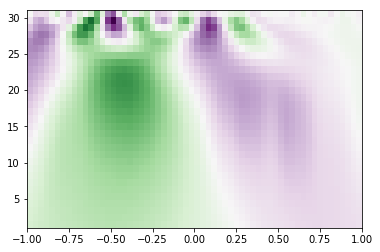

In [22]:
widths = np.arange(1,32)
cwtmatr = signal.cwt(np.array(left_ta)[100:160],signal.ricker,widths)
plt.imshow(cwtmatr, extent=[-1, 1, 1, 31], cmap='PRGn', aspect='auto',
           vmax=abs(cwtmatr).max(), vmin=-abs(cwtmatr).max())

In [14]:
cwtmatr.shape

(31, 52)

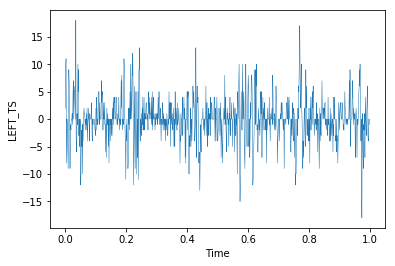

In [15]:
plt.figure()
sns.lineplot(x=t,y=left_ts,linewidth=0.5)
plt.show()

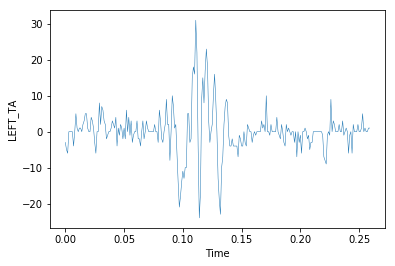

In [19]:
sns.lineplot(x=emg_data.Time[:260],y=emg_data.LEFT_TA[:260],linewidth=0.5)
plt.show()

In [21]:
np.array(left_ta)[100:160]

array([-11, -13, -10, -10,   5,   5,  -3,  -2,  15,  18,  16,  31,  22,
        -4, -24, -17,   9,  15,   8,  17,  23,  18,   3,  -3,   0,   2,
        10,  16,   9,   0, -13, -19, -23, -10,  -7,   2,   7,   9,   8,
        -1,  -4,  -4,  -2,  -4,  -4,  -4,  -4,  -7,  -1,  -2,  -4,  -4,
         0,  -3,  -4,   2,   1,   0,   0,  -3], dtype=int64)